In [2]:
import pandas as pd
import matplotlib.pyplot as plt
denver_data=pd.read_csv('/users/neiloza/Downloads/crime.csv', parse_dates=True, index_col='INCIDENT_ID')
denver_data.loc[:,['REPORTED_DATE']]=pd.to_datetime(denver_data.REPORTED_DATE)




In [3]:
denver_traffic=denver_data[denver_data['IS_TRAFFIC']==1]
denver_traffic=denver_traffic[denver_traffic['IS_CRIME']!=1]
denver_crime=denver_data[denver_data['IS_CRIME']==1]
denver_crime




,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
INCIDENT_ID,,,,,,,,,,,,,,,,,,
2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,2018-01-26 12:24:00,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,2018-01-30 10:33:00,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0
20186001048,20186001048230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/31/2018 12:55:00 AM,1/31/2018 6:55:00 AM,2018-01-31 07:07:00,2828 N ZUNI ST,3136231.0,1701209.0,-105.015451,39.757627,1,113,highland,1,0


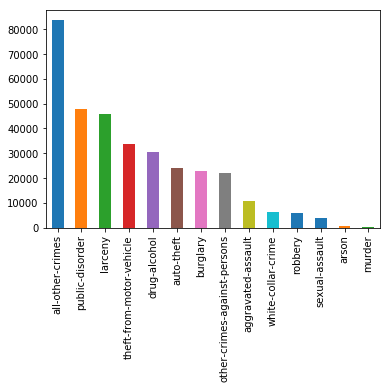

In [4]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.show()

COUNT                                    \
OFFENSE_CATEGORY_ID aggravated-assault all-other-crimes arson auto-theft   
REPORTED_DATE                                                              
2014                              1743            15251   129       3404   
2015                              2006            15728   107       4480   
2016                              2143            16462    95       4818   
2017                              2099            17232   125       5560   
2018                              2447            17629   114       5339   
2019                               179             1193     3        323   

                                                          \
OFFENSE_CATEGORY_ID burglary drug-alcohol larceny murder   
REPORTED_DATE                                              
2014                    4423         5978    9044     32   
2015                    4862         6186    8830     57   
2016                    4689         6081    9139     54   
2017                    4450         5670    8967     58   
2018                    4101         6136    9245     57   
2019                     233          378     581      1   

                                                                          \
OFFENSE_CATEGORY_ID other-crimes-against-persons public-disorder robbery   
REPORTED_DATE                                                              
2014                                        4046            9799    1057   
2015                                        4409            9776    1213   
2016                                        4638            9917    1154   
2017                                        4756            9348    1206   
2018                                        4089            8598    1203   
2019                                         256             487      71   

                                                                                
OFFENSE_CATEGORY_ID sexual-assault theft-from-motor-vehicle white-collar-crime  
REPORTED_DATE                                                                   
2014                           519                     4962                915  
2015                           685                     6255               1277  
2016                           710                     6549               1210  
2017                           854                     7327               1297  
2018                           885                     8126               1299  
2019                            53                      432                102

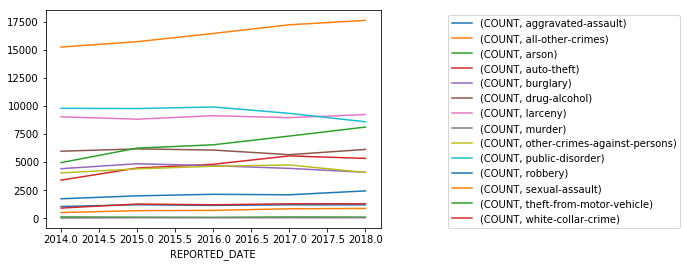

In [29]:
denver_crime_by_year=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']]
denver_crime_by_year=denver_crime_by_year.groupby([denver_crime_by_year.REPORTED_DATE.dt.year,denver_crime_by_year.OFFENSE_CATEGORY_ID]).agg('count')
denver_crime_by_year.columns=['COUNT']
denver_crime_by_year=denver_crime_by_year.unstack(level=1)
denver_crime_by_year.loc[:2018,:].plot(kind='line',)
plt.legend(loc=(1.2,0))
denver_crime_by_year

In [30]:
denver_crime_by_year['TOTAL']=denver_crime_by_year.sum(axis=1)
denver_crime_by_year

COUNT                                    \
OFFENSE_CATEGORY_ID aggravated-assault all-other-crimes arson auto-theft   
REPORTED_DATE                                                              
2014                              1743            15251   129       3404   
2015                              2006            15728   107       4480   
2016                              2143            16462    95       4818   
2017                              2099            17232   125       5560   
2018                              2447            17629   114       5339   
2019                               179             1193     3        323   

                                                          \
OFFENSE_CATEGORY_ID burglary drug-alcohol larceny murder   
REPORTED_DATE                                              
2014                    4423         5978    9044     32   
2015                    4862         6186    8830     57   
2016                    4689         6081    9139     54   
2017                    4450         5670    8967     58   
2018                    4101         6136    9245     57   
2019                     233          378     581      1   

                                                                          \
OFFENSE_CATEGORY_ID other-crimes-against-persons public-disorder robbery   
REPORTED_DATE                                                              
2014                                        4046            9799    1057   
2015                                        4409            9776    1213   
2016                                        4638            9917    1154   
2017                                        4756            9348    1206   
2018                                        4089            8598    1203   
2019                                         256             487      71   

                                                             \
OFFENSE_CATEGORY_ID sexual-assault theft-from-motor-vehicle   
REPORTED_DATE                                                 
2014                           519                     4962   
2015                           685                     6255   
2016                           710                     6549   
2017                           854                     7327   
2018                           885                     8126   
2019                            53                      432   

                                        TOTAL  
OFFENSE_CATEGORY_ID white-collar-crime         
REPORTED_DATE                                  
2014                               915  61302  
2015                              1277  65871  
2016                              1210  67659  
2017                              1297  68949  
2018                              1299  69268  
2019                               102   4292

/Users/neiloza/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


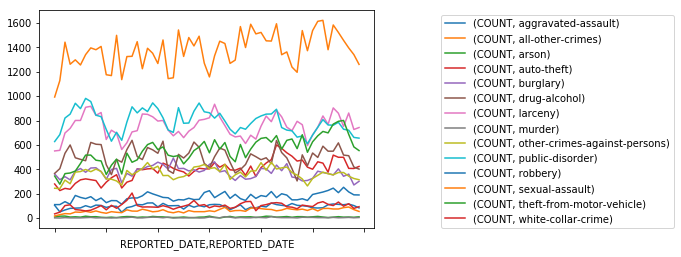

In [6]:
denver_crime_by_m_y=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']]
denver_crime_by_m_y.loc[:,['REPORTED_DATE']]=pd.to_datetime(denver_crime_by_m_y.REPORTED_DATE)
denver_crime_by_m_y=denver_crime_by_m_y.groupby([denver_crime_by_m_y.REPORTED_DATE.dt.year,denver_crime_by_m_y.REPORTED_DATE.dt.month,denver_crime_by_m_y.OFFENSE_CATEGORY_ID]).agg('count')
denver_crime_by_m_y.columns=['COUNT']
denver_crime_by_m_y=denver_crime_by_m_y.unstack(level=2)

denver_crime_by_m_y.loc[:(2018,12),:].plot(kind='line')
plt.legend(loc=(1.2,0))
plt.show()
#denver_crime_by_year

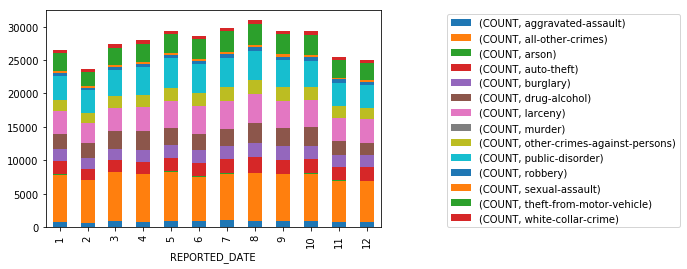

In [11]:
denver_crime_by_month=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']]
denver_crime_by_month.loc[:,['REPORTED_DATE']]=pd.to_datetime(denver_crime_by_month.REPORTED_DATE)
denver_crime_by_month=denver_crime_by_month.loc[denver_crime_by_month['REPORTED_DATE']<'2019-01-01',:]
denver_crime_by_month=denver_crime_by_month.groupby([denver_crime_by_month.REPORTED_DATE.dt.month,denver_crime_by_month.OFFENSE_CATEGORY_ID]).agg('count')
denver_crime_by_month.columns=['COUNT']
denver_crime_by_month=denver_crime_by_month.unstack(level=1)
denver_crime_by_month.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.show()

In [81]:
denver_crime_by_district=denver_crime[['OFFENSE_CATEGORY_ID','DISTRICT_ID']]
denver_crime_by_district=denver_crime_by_district.groupby(['DISTRICT_ID','OFFENSE_CATEGORY_ID']).size()
denver_crime_by_district=denver_crime_by_district.unstack(level=1)
denver_crime_by_district_w_totals=denver_crime_by_district
denver_crime_by_district.loc[7,'arson']=0
denver_crime_by_district['TOTAL']=denver_crime_by_district.sum(axis=1)
denver_crime_by_district_w_totals.loc['TOTAL']=denver_crime_by_district.sum(axis=0)
denver_crime_by_district_w_totals

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,TOTAL
DISTRICT_ID,,,,,,,,,,,,,,,
1,1653.0,17061.0,116.0,4369.0,4005.0,4697.0,6530.0,25.0,3690.0,8451.0,907.0,630.0,5091.0,804.0,58029.0
2,1854.0,14107.0,112.0,3486.0,3745.0,4798.0,4979.0,66.0,2936.0,7357.0,979.0,554.0,4690.0,760.0,50423.0
3,1526.0,10246.0,105.0,5469.0,7259.0,3360.0,10861.0,44.0,3921.0,9824.0,965.0,688.0,9880.0,1781.0,65929.0
4,1902.0,14671.0,123.0,5070.0,3220.0,3336.0,4933.0,47.0,3267.0,7669.0,921.0,496.0,5447.0,822.0,51924.0
5,1091.0,8257.0,63.0,2472.0,2001.0,1434.0,5862.0,35.0,2205.0,4755.0,618.0,352.0,3563.0,639.0,33347.0
6,2566.0,18284.0,54.0,2541.0,2516.0,12706.0,11619.0,40.0,6040.0,9603.0,1502.0,956.0,4788.0,917.0,74132.0
7,25.0,869.0,0.0,517.0,12.0,98.0,1022.0,2.0,135.0,266.0,12.0,30.0,192.0,377.0,3557.0
TOTAL,10617.0,83495.0,573.0,23924.0,22758.0,30429.0,45806.0,259.0,22194.0,47925.0,5904.0,3706.0,33651.0,6100.0,337341.0


In [86]:
crime_district_pct=denver_crime_by_district_w_totals.div(denver_crime_by_district_w_totals['TOTAL'],axis=0)
crime_district_pct

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,TOTAL
DISTRICT_ID,,,,,,,,,,,,,,,
1,0.028486,0.294008,0.001999,0.075290,0.069017,0.080942,0.112530,0.000431,0.063589,0.145634,0.015630,0.010857,0.087732,0.013855,1.0
2,0.036769,0.279773,0.002221,0.069135,0.074272,0.095155,0.098745,0.001309,0.058227,0.145906,0.019416,0.010987,0.093013,0.015072,1.0
3,0.023146,0.155410,0.001593,0.082953,0.110103,0.050964,0.164738,0.000667,0.059473,0.149009,0.014637,0.010435,0.149858,0.027014,1.0
4,0.036630,0.282548,0.002369,0.097643,0.062014,0.064248,0.095004,0.000905,0.062919,0.147697,0.017737,0.009552,0.104903,0.015831,1.0
5,0.032717,0.247608,0.001889,0.074130,0.060005,0.043002,0.175788,0.001050,0.066123,0.142592,0.018532,0.010556,0.106846,0.019162,1.0
6,0.034614,0.246641,0.000728,0.034277,0.033939,0.171397,0.156734,0.000540,0.081476,0.129539,0.020261,0.012896,0.064587,0.012370,1.0
7,0.007028,0.244307,0.000000,0.145347,0.003374,0.027551,0.287321,0.000562,0.037953,0.074782,0.003374,0.008434,0.053978,0.105988,1.0
TOTAL,0.031473,0.247509,0.001699,0.070919,0.067463,0.090202,0.135785,0.000768,0.065791,0.142067,0.017502,0.010986,0.099754,0.018083,1.0


In [85]:
denver_crime_by_neighborhood=denver_crime[['OFFENSE_CATEGORY_ID','NEIGHBORHOOD_ID']]
denver_crime_by_neighborhood=denver_crime_by_neighborhood.groupby(['NEIGHBORHOOD_ID','OFFENSE_CATEGORY_ID']).size()
denver_crime_by_neighborhood=denver_crime_by_neighborhood.unstack(level=1)
denver_crime_by_neighborhood=denver_crime_by_neighborhood.fillna(value=0)
denver_crime_by_neighborhood_w_totals=denver_crime_by_neighborhood
denver_crime_by_neighborhood['TOTAL']=denver_crime_by_neighborhood.sum(axis=1)
denver_crime_by_neighborhood_w_totals.loc['TOTAL']=denver_crime_by_neighborhood.sum(axis=0)
denver_crime_by_neighborhood_w_totals

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,TOTAL
NEIGHBORHOOD_ID,,,,,,,,,,,,,,,
athmar-park,182.0,1814.0,10.0,466.0,312.0,474.0,332.0,4.0,260.0,774.0,101.0,46.0,479.0,80.0,5334.0
auraria,32.0,1144.0,3.0,88.0,76.0,275.0,728.0,0.0,182.0,394.0,28.0,34.0,166.0,35.0,3185.0
baker,153.0,1789.0,11.0,418.0,420.0,563.0,1448.0,5.0,301.0,860.0,101.0,39.0,565.0,91.0,6764.0
barnum,141.0,1698.0,13.0,338.0,231.0,271.0,171.0,5.0,227.0,587.0,81.0,42.0,301.0,51.0,4157.0
barnum-west,69.0,594.0,5.0,275.0,170.0,251.0,118.0,2.0,121.0,285.0,31.0,16.0,257.0,26.0,2220.0
bear-valley,78.0,316.0,9.0,387.0,185.0,152.0,218.0,1.0,199.0,507.0,28.0,29.0,436.0,45.0,2590.0
belcaro,17.0,205.0,3.0,76.0,172.0,42.0,209.0,1.0,49.0,132.0,14.0,15.0,219.0,40.0,1194.0
berkeley,70.0,692.0,2.0,273.0,350.0,195.0,407.0,0.0,179.0,477.0,50.0,29.0,417.0,57.0,3198.0
capitol-hill,414.0,2212.0,8.0,637.0,489.0,2680.0,1739.0,6.0,905.0,1567.0,268.0,147.0,1012.0,115.0,12199.0


In [87]:
denver_neighborhood_percents=denver_crime_by_neighborhood.div(denver_crime_by_neighborhood_w_totals['TOTAL'],axis=0)
denver_neighborhood_percents

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,TOTAL
NEIGHBORHOOD_ID,,,,,,,,,,,,,,,
athmar-park,0.034121,0.340082,0.001875,0.087364,0.058493,0.088864,0.062242,0.000750,0.048744,0.145107,0.018935,0.008624,0.089801,0.014998,1.0
auraria,0.010047,0.359184,0.000942,0.027630,0.023862,0.086342,0.228571,0.000000,0.057143,0.123705,0.008791,0.010675,0.052119,0.010989,1.0
baker,0.022620,0.264488,0.001626,0.061798,0.062093,0.083235,0.214075,0.000739,0.044500,0.127144,0.014932,0.005766,0.083530,0.013454,1.0
barnum,0.033919,0.408468,0.003127,0.081309,0.055569,0.065191,0.041135,0.001203,0.054607,0.141208,0.019485,0.010103,0.072408,0.012268,1.0
barnum-west,0.031081,0.267568,0.002252,0.123874,0.076577,0.113063,0.053153,0.000901,0.054505,0.128378,0.013964,0.007207,0.115766,0.011712,1.0
bear-valley,0.030116,0.122008,0.003475,0.149421,0.071429,0.058687,0.084170,0.000386,0.076834,0.195753,0.010811,0.011197,0.168340,0.017375,1.0
belcaro,0.014238,0.171692,0.002513,0.063652,0.144054,0.035176,0.175042,0.000838,0.041039,0.110553,0.011725,0.012563,0.183417,0.033501,1.0
berkeley,0.021889,0.216385,0.000625,0.085366,0.109443,0.060976,0.127267,0.000000,0.055972,0.149156,0.015635,0.009068,0.130394,0.017824,1.0
capitol-hill,0.033937,0.181326,0.000656,0.052217,0.040085,0.219690,0.142553,0.000492,0.074186,0.128453,0.021969,0.012050,0.082958,0.009427,1.0


In [95]:
denver_neighborhood_percents.nlargest(5,'murder')['murder']

NEIGHBORHOOD_ID
cole                   0.003102
northeast-park-hill    0.002557
kennedy                0.002494
wellshire              0.002451
whittier               0.001693
Name: murder, dtype: float64